The goal of this practical session is to introduce Python and Scikit-Learn, a library for running different machine learning models and use them for solving AI/data science problems.

## Linear regression and k-NN: doing it ourselves

We are going to write a first program to compute the coefficients of a regression line and a second program to compute the k-nearest neighbours (k-NN) of a given point.

### Linear regression

We'll start with a simple data set:

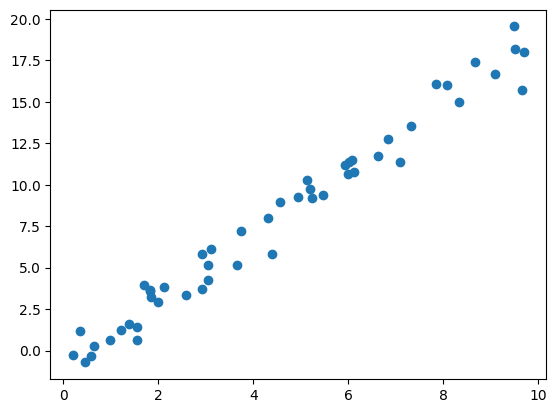

In [2]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

$\rightarrow$ Print the values of x and y. What's the type of x and y? What's their relation? What's the level of noise in this relation?

x et y sont des nombres rééls. On a y ~ 2x - 1 avec un léger bruit dans le dataset (< 1.0).

   
We now want to find the relation between x and y solely from the observed points. We can postulate different possible relations (models): linear, polynomial of degree 2, spline, ... and learn the parameters of the models from the data. We'll start here with the most simple model, the linear one, which assumes that the relation takes the form:

\begin{equation*}
 y = ax + b,
\end{equation*}

where $a$ and $b$ are real numbers, respectively called the slope and the intercept (or bias). Learning the model thus amounts to learn the values of $a$ and $b$ from the observed data (we will denote by $\hat{a}$ and $\hat{b}$ the values of $a$ and $b$ learned from the observed data).

We nevertheless need to guide the learning by stating some properties on the desired line. In linear regression, the property we require is that the line learned should be as close as possible to the obersved data. By "as close as", we mean that the sum of squared residuals should be as small as possible (this method is sometimes referred to as OLS for Ordinary Least Square). The residual is defined as the error in approximating y by a linear relation. If we have observed $n$ points (x<sub>i</sub>,y<sub>i</sub>)<sub>$1 \le i \le n$</sub>, the sum of residuals amounts to:

\begin{equation*}
 \sum_{i=1}^{n}(y_i - a x_i + b)^2.
\end{equation*}

The above optimization problem leads to the following solution (we'll see that later in the course) where $\bar{x}$ and $\bar{y}$ denote the means of x and y:

\begin{align}
 \hat{a} = & \frac{\sum_{i=1}^{n}(x_i - \bar{x}) (y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}, \\
 \hat{b} = & \bar{y} - \hat{a} \bar{x}.
\end{align}

$\rightarrow$ Write a program that computes the coefficients of the line (slope and intercept) and draw the line together with the orginal data points.

$\rightarrow$ How to use the above results to predict the y value of new points for which we only know x?

1.802269962716409 -0.12121978305564074
[ 7.22926896 18.18565441 13.52423055 10.67206599  0.64185082  1.4000462
 -0.29896653 17.38064514 11.36591852 11.3984114  -0.26422614 18.01311476
 14.97193082  3.8584585   3.66749887  3.59937032  4.24562734  9.18591626
  7.9701638   5.80012793 10.75788366  1.60421824  3.736558    5.13103024
  8.93392551 16.05975926  2.92146552 10.28822167 11.2099274  -0.7161115
 11.51229264  3.94851904  0.26520582 19.5423544  15.69289556 15.98984947
  5.17932245  0.65443493 12.77642131  5.81548096  1.22109281  9.26065077
  1.16566447 16.66813782  3.36710603 11.74868864  6.14962364  9.73011153
  9.40444538  3.21035654]
[ 6.62900428 17.01321859 13.07128716 10.66822226  2.69065731  2.6902226
  0.92560371 15.48961272 10.71249551 12.6401596   0.24976837 17.35917415
 14.88164389  3.70570423  3.15575699  3.18422461  5.36204678  9.33630776
  7.66359554  5.12751553 10.90602115  2.39283617  5.14401547  6.48160967
  8.09839255 14.02977072  3.47744082  9.14667304 10.55569005  

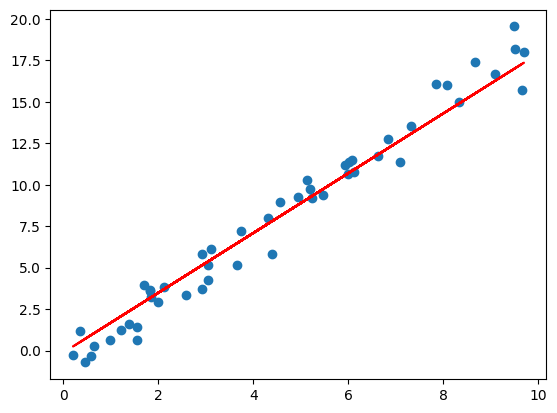

In [3]:
x_mean = np.mean(x)
y_mean = np.mean(y)

numerateur = 0
denominateur = 0
for i in range(x.shape[0]):
    j = x[i] - x_mean
    numerateur = j * (y[i] - y_mean)
    denominateur = pow(j, 2)
    
a = numerateur / denominateur
    
b = y_mean - a * x_mean

print(a, b)

print(y)
print(a * x + b)

plt.scatter(x, y)
plt.plot(x, a * x + b, color='red')

### k-Nearest Neighbours (k-NN) on Iris dataset

We are now going to implement a code that can predict a class label of a new example given known class labels of several examples. The examples with the known labels constitute the <span style="color:green">training set</span>.

To do so we are going to consider the Iris dataset, which consists of 4-dimensional examples (the dimensions correspond to sepal length, sepal width, petal length and petal width) associated with a class label from three possible iris species. 

For each new example with unknown class label, the $k$-NN algorithm consists in retrieving the $k$ nearest neighbours in the training set (using in our case their 4-dimensional representation) and in assigning to the new example the majority class in the set of $k$ nearest neigbours.

$\rightarrow$ You are asked to write a code that can take that can predict the class label of examples which are not part of the training set (this set of examples will be referred to as the <span style="color:green">test set</span> in the remainder). The value of $k$ should be an argument of your program, which you can play with. You'll use the standard Eucliden distance to measure the distance between point and select the $k$ closest ones.

The Iris dataset can be loaded and split in train/test parts using the following commands:

In [4]:
from sklearn.datasets import load_iris
dataset = load_iris()
X_iris = dataset.data
y_iris = dataset.target

In [5]:
from sklearn.model_selection import train_test_split
from math import sqrt

# Retourne la distance euclidienne entre deux points (4 dims pour chaque point)
def euclidian_distance(a, b):
    y = 0
    for i in range(a.shape[0]): # a.shape[0] = 4
        y += pow(a[i] - b[i], 2)
    return sqrt(y)
     

def find_k_neighbors(k, target, x, y):
    neighbors = [] # Liste des indices dans Xtains des k voisins les plus proches
    for i in range(k): # Tant qu'on a pas k voisins
        min_d = 9999999999999 # Distance minimale
        neighbor = None # Indice du point le plus proche
        for j in range(x.shape[0]): # Pour chaque point de Xtrain
            if not j in neighbors: # Si le point n'est pas déjà dans les voisins
                # Recherche du point le plus proche
                d = euclidian_distance(target, x[j])
                if d < min_d: 
                    min_d = d
                    neighbor = j
        neighbors.append(neighbor)
    
    # Recherche de la classe majoritaire parmit les voisins
    classes = {}
    for n in neighbors:
        if not y[n] in classes:
            classes[y[n]] = 0
        classes[y[n]] += 1
    
    c_max = -1 # Nombre d'occurence de la classe majoritaire
    classe = -1 # Classe majoritaire
    for i, v in zip(classes.keys(), classes.values()):
        if v > c_max:
            c_max = v
            classe = i
    return classe
        
        

# Chaque ligne de Xtrain à une valeur associée dans ytrain
# On cherche pour chaque ligne de Xtest la valeur qui lui est associée et on vérifie avec ytest
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)
# Xtrain c'est les points dont on connait la classe
    # c'est un tableau de 4 dimensions
# Xtest c'est les points dont on ne connait pas la classe
    # c'est un tableau de 4 dimensions
# ytrain c'est les classes des points de Xtrain
    # c'est un tableau de 1 dimension
# ytest c'est les classes des points de Xtest
    # c'est un tableau de 1 dimension

k = 5

for i in range(Xtest.shape[0]):
    print(f"Classe prédite : {find_k_neighbors(k, Xtest[i], Xtrain, ytrain)}, classe attendue : {ytest[i]}")



Classe prédite : 0, classe attendue : 0
Classe prédite : 1, classe attendue : 1
Classe prédite : 1, classe attendue : 1
Classe prédite : 0, classe attendue : 0
Classe prédite : 2, classe attendue : 2
Classe prédite : 1, classe attendue : 1
Classe prédite : 2, classe attendue : 2
Classe prédite : 0, classe attendue : 0
Classe prédite : 0, classe attendue : 0
Classe prédite : 2, classe attendue : 2
Classe prédite : 1, classe attendue : 1
Classe prédite : 0, classe attendue : 0
Classe prédite : 2, classe attendue : 2
Classe prédite : 1, classe attendue : 1
Classe prédite : 1, classe attendue : 1
Classe prédite : 0, classe attendue : 0
Classe prédite : 1, classe attendue : 1
Classe prédite : 1, classe attendue : 1
Classe prédite : 0, classe attendue : 0
Classe prédite : 0, classe attendue : 0
Classe prédite : 1, classe attendue : 1
Classe prédite : 1, classe attendue : 1
Classe prédite : 1, classe attendue : 1
Classe prédite : 0, classe attendue : 0
Classe prédite : 2, classe attendue : 2


## The same (and more) using Scikit-Learn

The Scikit-Learn API is designed with the following guiding principles in mind, as outlined in the Scikit-Learn API paper:

* Consistency: All objects share a common interface drawn from a limited set of methods, with consistent documentation.

* Inspection: All specified parameter values are exposed as public attributes.

* Limited object hierarchy: Only algorithms are represented by Python classes; datasets are represented in standard formats (NumPy arrays, Pandas DataFrames, SciPy sparse matrices) and parameter names use standard Python strings.

* Composition: Many machine learning tasks can be expressed as sequences of more fundamental algorithms, and Scikit-Learn makes use of this wherever possible.

* Sensible defaults: When models require user-specified parameters, the library defines an appropriate default value.

In practice, these principles make Scikit-Learn very easy to use, once the basic principles are understood. Every machine learning algorithm in Scikit-Learn is implemented via the Estimator API, which provides a consistent interface for a wide range of machine learning applications.

Most commonly, the steps in using the Scikit-Learn estimator API are as follows (we will step through a handful of detailed examples in the sections that follow).

* Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
* Choose model hyperparameters by instantiating this class with desired values.
* Arrange data into a features matrix and target vector following the discussion above.
* Fit the model to your data by calling the fit() method of the model instance.
* Apply the Model to new data:
  * For supervised learning, often we predict labels for unknown data using the predict() method.
  * For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

We will now step through several simple examples of applying supervised and unsupervised learning methods.

### Linear regression

As an example of this process, let's consider a simple linear regression—that is, the common case of fitting a line to (𝑥,𝑦)  data. We will use the same simple data as before for our regression example:

x: [3.74540119 9.50714306 7.31993942 5.98658484 1.5601864  1.5599452
 0.58083612 8.66176146 6.01115012 7.08072578 0.20584494 9.69909852
 8.32442641 2.12339111 1.81824967 1.8340451  3.04242243 5.24756432
 4.31945019 2.9122914  6.11852895 1.39493861 2.92144649 3.66361843
 4.56069984 7.85175961 1.99673782 5.14234438 5.92414569 0.46450413
 6.07544852 1.70524124 0.65051593 9.48885537 9.65632033 8.08397348
 3.04613769 0.97672114 6.84233027 4.40152494 1.22038235 4.9517691
 0.34388521 9.09320402 2.58779982 6.62522284 3.11711076 5.20068021
 5.46710279 1.84854456]
y: [ 7.22926896 18.18565441 13.52423055 10.67206599  0.64185082  1.4000462
 -0.29896653 17.38064514 11.36591852 11.3984114  -0.26422614 18.01311476
 14.97193082  3.8584585   3.66749887  3.59937032  4.24562734  9.18591626
  7.9701638   5.80012793 10.75788366  1.60421824  3.736558    5.13103024
  8.93392551 16.05975926  2.92146552 10.28822167 11.2099274  -0.7161115
 11.51229264  3.94851904  0.26520582 19.5423544  15.69289556 15.98984947


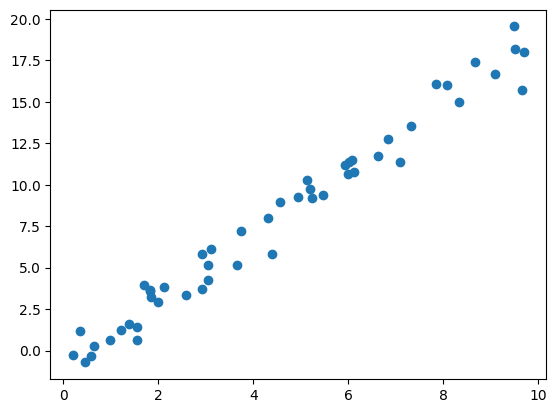

In [6]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42) # 42 est la graine
x = 10 * rng.rand(50)           # 50 nombres aléatoires entre 0 et 10
y = 2 * x - 1 + rng.randn(50)   # y = 2x - 1 + bruit
plt.scatter(x, y)               # Affiche les points (x, y)
print("x:",x)                   # Affiche les valeurs de x
print("y:", y)                  # Affiche les valeurs de y

Let's now walk through the process of building a linear regression model (the process is the same for all ML models).

1. Choose a class of model

In Scikit-Learn, every class of model is represented by a Python class. So, for example, if we would like to compute a simple linear regression model, we can import the linear regression class:

In [7]:
from sklearn.linear_model import LinearRegression

2. Choose model hyperparameters

An important point is that a class of model is not the same as an instance of a model.

Once we have decided on our model class, there are still some options open to us. Depending on the model class we are working with, we might need to answer one or more questions like the following:

Would we like to fit for the offset (i.e., y-intercept)?
Would we like the model to be normalized?
Would we like to preprocess our features to add model flexibility?
What degree of regularization would we like to use in our model?
How many model components would we like to use?
These are examples of the important choices that must be made once the model class is selected. These choices are often represented as hyperparameters, or parameters that must be set before the model is fit to data. In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation. We will explore how you can quantitatively motivate the choice of hyperparameters later.

For our linear regression example, we can instantiate the LinearRegression class and specify that we would like to fit the intercept using the fit_intercept hyperparameter:

In [8]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

$\rightarrow$ Explain the fit_intercept hyperparameter.

Ce paramètre est vrai lorsque l'on cherche à calculer l'ordonnée à l'origine et faux sinon.

Keep in mind that when the model is instantiated, the only action is the storing of these hyperparameter values. In particular, we have not yet applied the model to any data: the Scikit-Learn API makes very clear the distinction between choice of model and application of model to data

3. Arrange data into a features matrix and target vector

Previously we detailed the Scikit-Learn data representation, which requires a two-dimensional features matrix and a one-dimensional target array. Here our target variable y is already in the correct form (a length-n_samples array), but we need to massage the data x to make it a matrix of size [n_samples, n_features]. In this case, this amounts to a simple reshaping of the one-dimensional array:

In [9]:
X = x[:, np.newaxis] # np.newaxis permet de rajouter une dimension à un tableau
X.shape

(50, 1)

4. Fit the model to your data

Now it is time to apply our model to data. This can be done with the fit() method of the model:

In [10]:
model.fit(X, y) # On calcule les paramètres a et b

LinearRegression()

This fit() command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore. In Scikit-Learn, by convention all model parameters that were learned during the fit() process have trailing underscores; for example in this linear model, we have the following:

In [11]:
# model.coef_
# model.intercept_

print(model.coef_, model.intercept_) # a et b

[1.9776566] -0.9033107255311146


These two parameters represent the slope and intercept of the simple linear fit to the data. Comparing to the data definition, we see that they are very close to the input slope of 2 and intercept of -1.

5. Predict labels for unknown data

Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set. In Scikit-Learn, this can be done using the predict() method. For the sake of this example, our "new data" will be a grid of x values, and we will ask what y values the model predicts:

In [12]:
xfit = np.linspace(-1, 11) # On crée un tableau de 50 nombres entre -1 et 11
print("xfit: ",xfit) # On affiche le tableau

xfit:  [-1.         -0.75510204 -0.51020408 -0.26530612 -0.02040816  0.2244898
  0.46938776  0.71428571  0.95918367  1.20408163  1.44897959  1.69387755
  1.93877551  2.18367347  2.42857143  2.67346939  2.91836735  3.16326531
  3.40816327  3.65306122  3.89795918  4.14285714  4.3877551   4.63265306
  4.87755102  5.12244898  5.36734694  5.6122449   5.85714286  6.10204082
  6.34693878  6.59183673  6.83673469  7.08163265  7.32653061  7.57142857
  7.81632653  8.06122449  8.30612245  8.55102041  8.79591837  9.04081633
  9.28571429  9.53061224  9.7755102  10.02040816 10.26530612 10.51020408
 10.75510204 11.        ]


$\rightarrow$ What's the effect of linspace?

As before, we need to coerce these x values into a [n_samples, n_features] features matrix, after which we can feed it to the model:

In [13]:
Xfit = xfit[:, np.newaxis] # On rajoute une dimension à xfit (on obtient un tableau de 50 tableaux de 1 dimension)
yfit = model.predict(Xfit) # On calcule les y correspondant à xfit (on obtient un tableau de 50 nombres)
print("Xfit: ",Xfit)
print("yfit: ",yfit)

Xfit:  [[-1.        ]
 [-0.75510204]
 [-0.51020408]
 [-0.26530612]
 [-0.02040816]
 [ 0.2244898 ]
 [ 0.46938776]
 [ 0.71428571]
 [ 0.95918367]
 [ 1.20408163]
 [ 1.44897959]
 [ 1.69387755]
 [ 1.93877551]
 [ 2.18367347]
 [ 2.42857143]
 [ 2.67346939]
 [ 2.91836735]
 [ 3.16326531]
 [ 3.40816327]
 [ 3.65306122]
 [ 3.89795918]
 [ 4.14285714]
 [ 4.3877551 ]
 [ 4.63265306]
 [ 4.87755102]
 [ 5.12244898]
 [ 5.36734694]
 [ 5.6122449 ]
 [ 5.85714286]
 [ 6.10204082]
 [ 6.34693878]
 [ 6.59183673]
 [ 6.83673469]
 [ 7.08163265]
 [ 7.32653061]
 [ 7.57142857]
 [ 7.81632653]
 [ 8.06122449]
 [ 8.30612245]
 [ 8.55102041]
 [ 8.79591837]
 [ 9.04081633]
 [ 9.28571429]
 [ 9.53061224]
 [ 9.7755102 ]
 [10.02040816]
 [10.26530612]
 [10.51020408]
 [10.75510204]
 [11.        ]]
yfit:  [-2.88096733 -2.39664326 -1.9123192  -1.42799513 -0.94367106 -0.459347
  0.02497707  0.50930113  0.9936252   1.47794926  1.96227333  2.44659739
  2.93092146  3.41524552  3.89956959  4.38389366  4.86821772  5.35254179
  5.83686585  6.32

$\rightarrow$ What's the effect of xfit[:, np.newaxis]? Of model.predict(Xfit)? What's the ype of Xfit ? Of yfit ?

Finally, let's visualize the results by plotting first the raw data, and then this model fit:

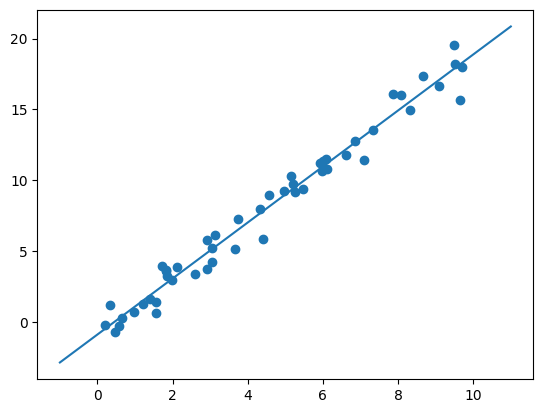

In [14]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

### k-Nearest Neighbours on Iris dataset

Let's take a look at another example of this process, using the Iris dataset. Our question will be this: given a model trained on a portion of the Iris data, how well can we predict the remaining labels?

For this task, we will use an extremely simple algorithm known as the $k$-NN algorithm (see above). We would like to evaluate the model on data it has not seen before, and so we will split the data into a training set and a testing set. This could be done by hand, but it is more convenient to use the train_test_split utility function:

In [15]:
from sklearn.datasets import load_iris # On importe le dataset
dataset = load_iris() # On charge le dataset
X_iris = dataset.data # On récupère les données
y_iris = dataset.target # On récupère les classes

In [16]:
from sklearn.model_selection import train_test_split # On importe la fonction train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1) # On sépare les données en deux parties, random_state permet de fixer la graine pour avoir toujours les mêmes résultats

$\rightarrow$ What's the use of random_state?

$\rightarrow$ With the data arranged, we can follow the above recipe to predict the labels using the k-NN algorithm. Write the corresponding code:

<span style="color:green">from sklearn.??? import ??? # 1. choose model class</span>

<span style="color:green">model = ???                      # 2. instantiate model</span>

<span style="color:green">model.fit(Xtrain, ytrain)                  # 3. fit model to data</span>

<span style="color:green">??? = model.predict(Xtest)             # 4. predict on new data</span>

In [17]:
from sklearn.linear_model import LogisticRegression # 1. choose model class (on choisit la régression logistique parce que la regression linéaire ne gere que 2 classes)
model = LogisticRegression() # 2. instantiate model
model.fit(Xtrain, ytrain) # 3. fit model to data
y_model = model.predict(Xtest) # 4. predict on new data
print(y_model)

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0]


/home/romain/.venv/lib64/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Finally, we can use the accuracy_score utility to see the fraction of predicted labels that match their true value:

In [18]:
from sklearn.metrics import accuracy_score # On importe la fonction accuracy_score
accuracy_score(ytest, y_model) # On calcule la précision

#compute the confusion matrix
from sklearn.metrics import confusion_matrix # On importe la fonction confusion_matrix
confusion_matrix(ytest, y_model) # On calcule la matrice de confusion

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

$\rightarrow$ What is accuracy? Give its formula and explain it.

$\rightarrow$ What's the confusion matrix of the k-NN algorithm on the Iris dataset? Write a code to compute and visualize this matrix.